In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df2 = pd.read_csv('olist_customers_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

df4 = pd.read_csv('olist_order_items_dataset.csv')
df5 = pd.read_csv('olist_products_dataset.csv')

cols = ['customer_id', 'order_id', 'order_purchase_timestamp']
orders = df1[cols]
orders = orders.set_index('customer_id')
orders.drop_duplicates(inplace=True)

## Adding two more df
cols = ['product_id', 'order_id']
items = df4[cols]
items = items.set_index('order_id')
items.drop_duplicates(inplace=True)

cols = ['product_id', 'product_category_name']
products = df1[cols]
products = products.set_index('product_id')
products.drop_duplicates(inplace=True)

# too few
cols = ['order_id', 'payment_value']
payment = df3[cols]
payment = payment.set_index('order_id')
payment.drop_duplicates(inplace=True)

cols = ['customer_id', 'customer_unique_id']
customers = df2[cols]
customers = customers.set_index('customer_id')

elog = pd.concat([orders,customers], axis=1, join='inner')
elog.reset_index(inplace=True)

cols = ['customer_unique_id', 'order_purchase_timestamp']
elog = elog[cols]

elog['order_purchase_timestamp'] = pd.to_datetime(elog['order_purchase_timestamp'])
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog['order_date'] = pd.to_datetime(elog['order_date'])

cols = ['customer_unique_id', 'order_date']
elog = elog[cols]

elog.columns = ['CUSTOMER_ID', 'ORDER_DATE']

elog.info()
display(elog.sample(5))

KeyError: "None of [Index(['product_id', 'product_category_name'], dtype='object')] are in the [columns]"

In [3]:
##First merge

df1 = pd.read_csv('olist_orders_dataset.csv')
df4 = pd.read_csv('olist_order_items_dataset.csv')
df5 = pd.read_csv('olist_products_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

dfmerged1 = pd.merge(df1, df4, on = 'order_id', how = 'inner')
dfmerged2 = pd.merge(dfmerged1, df5, on = 'product_id', how = 'inner')
dfmerged3 = pd.merge(dfmerged2, df3, on = 'order_id', how = 'inner')

dfmerged3.drop_duplicates(inplace=True)

dfmerged3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77


In [4]:
dfmerged3.drop_duplicates(inplace=True)
dfmerged3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 26 columns):
order_id                         117601 non-null object
customer_id                      117601 non-null object
order_status                     117601 non-null object
order_purchase_timestamp         117601 non-null object
order_approved_at                117586 non-null object
order_delivered_carrier_date     116356 non-null object
order_delivered_customer_date    115034 non-null object
order_estimated_delivery_date    117601 non-null object
order_item_id                    117601 non-null int64
product_id                       117601 non-null object
seller_id                        117601 non-null object
shipping_limit_date              117601 non-null object
price                            117601 non-null float64
freight_value                    117601 non-null float64
product_category_name            115903 non-null object
product_name_lenght              115903 non-null

In [5]:
numeric_vars = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g']
categorical_vars = ['product_category_name']   

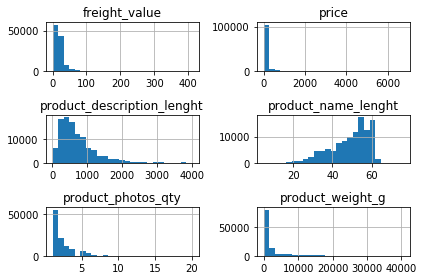

In [6]:
# Histograms
ax = dfmerged2[numeric_vars].hist(bins=25)
plt.tight_layout()

In [7]:
dfmerged3.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value
count,117601.000000,117601.000000,117601.000000,115903.000000,115903.000000,115903.000000,117581.000000,117581.000000,117581.000000,117581.000000,117601.000000,117601.000000,117601.000000
mean,1.195900,120.824783,20.045990,48.767590,786.950855,2.207881,2114.309497,30.257235,16.630306,23.068574,1.093528,2.939482,172.686752
std,0.697706,184.479323,15.861315,10.035011,653.036231,1.719531,3788.798201,16.190920,13.458952,11.748468,0.726692,2.774223,267.592290
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000
50%,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.210000
75%,1.000000,134.900000,21.190000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.260000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000


In [8]:
formula = 'price ~ freight_value + payment_value + C(payment_type) + product_name_lenght + product_description_lenght + product_photos_qty + product_weight_g'

linear_model = smf.ols(formula=formula, data=dfmerged3).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 1.789e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:23:49   Log-Likelihood:            -7.1853e+05
No. Observations:              115902   AIC:                         1.437e+06
Df Residuals:                  115892   BIC:                         1.437e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -36.6057      1.947    -18.802      0.000     -40.422     -32.790
C(payment_type)[T.credit_card]    19.8924      0.892     22.296      0.000      18.144      21.641
C(payment_type)[T.debit_card]     18.6470      3.029      6.155      0.000      12.709      24.585
C(payment_type)[T.voucher]        52.3109      1.722     30.382      0.000      48.936      55.686
freight_value                      1.4644      0.029     50.747      0.000       1.408       1.521
payment_value                      0.4578      0.001    318.903      0.000       0.455       0.461
product_name_lenght                0.0082      0.035      0.231      0.817      -0.061       0.077
product_description_lenght         0.0223      0.001     40.622      0.000       0.021       0.023
product_photos_qty                 3.5212      0.207     17.015      0.000       3.116       3.927
product_weight_g                   0.0026      0.000     22.061      0.000       0.002       0.003
==============================================================================
Omnibus:                    73908.848   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        254023027.494
Skew:                          -1.391   Prob(JB):                         0.00
Kurtosis:                     232.332   Cond. No.                     3.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
formula = 'price ~ product_weight_g + product_photos_qty'

linear_model = smf.ols(formula=formula, data=dfmerged2).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7396.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:23:55   Log-Likelihood:            -7.2932e+05
No. Observations:              111046   AIC:                         1.459e+06
Df Residuals:                  111043   BIC:                         1.459e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             75.6126      0.885     85.483      0.000      73.879      77.346
product_weight_g       0.0166      0.000    120.223      0.000       0.016       0.017
product_photos_qty     4.7016      0.300     15.656      0.000       4.113       5.290
==============================================================================
Omnibus:                   155793.845   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         81360612.336
Skew:                           8.085   Prob(JB):                         0.00
Kurtosis:                     134.616   Cond. No.                     7.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df3.head(30)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [11]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Text(0, 0.5, 'average product_weight_g')

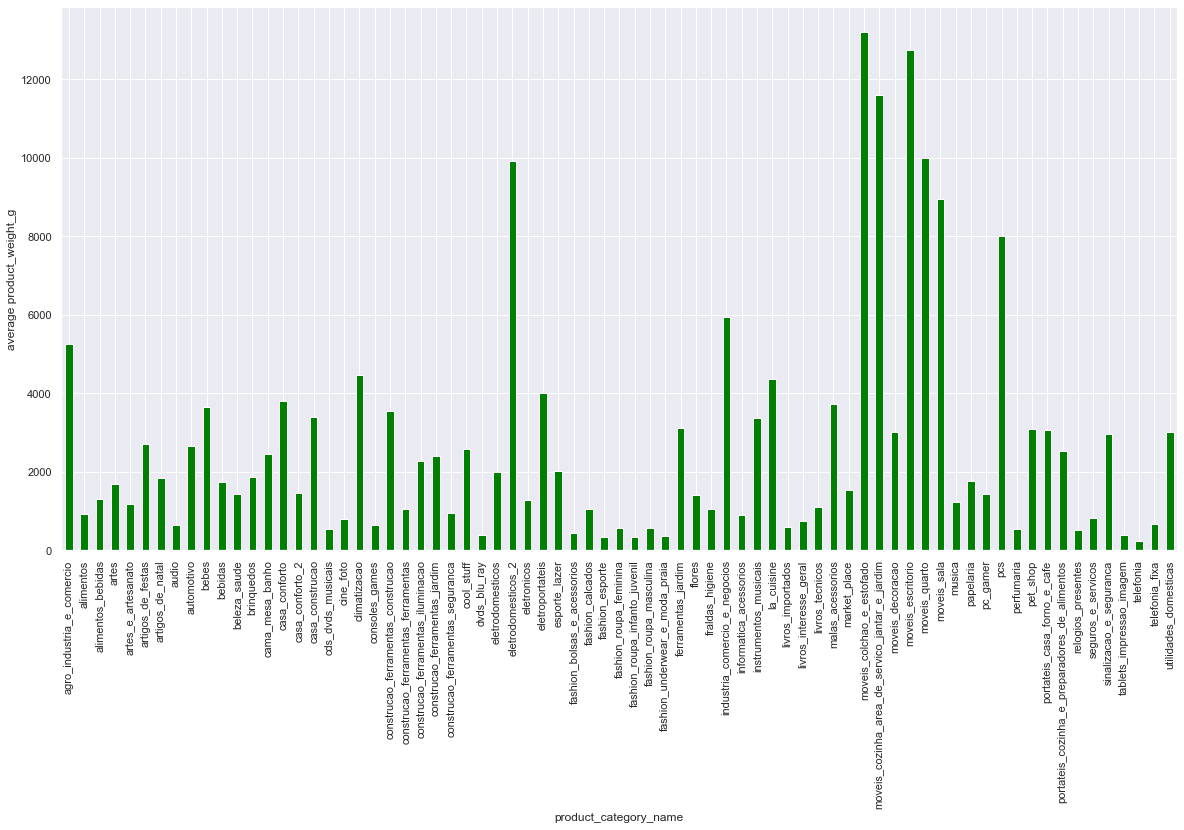

In [14]:
# Categorical vs Numeric

df5 = pd.read_csv('olist_products_dataset.csv')

agg = df5.groupby('product_category_name')['product_weight_g'].mean()
agg.plot(kind='bar', figsize=(20,10), color = ['green']).set_ylabel('average product_weight_g')

(1, 8)

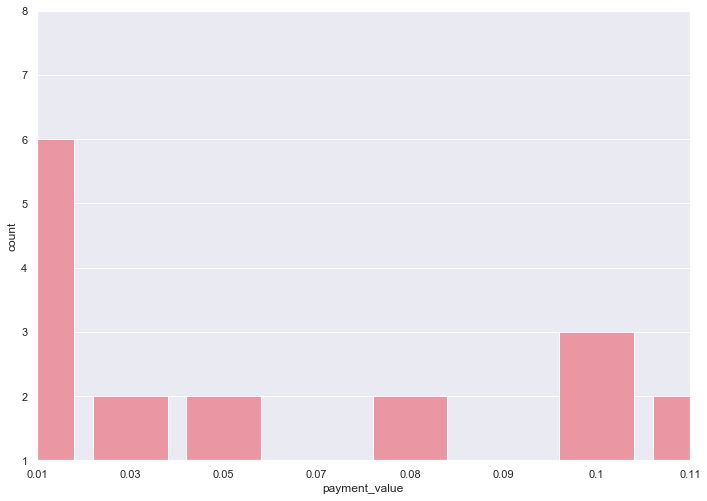

In [13]:
df3 = pd.read_csv('olist_order_payments_dataset.csv')

sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'payment_value', data = df3)
plt.ylim(1,8) 
plt.xlim(1,8) 

In [15]:
df3.head(30)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


Text(0, 0.5, 'avg_payment_value')

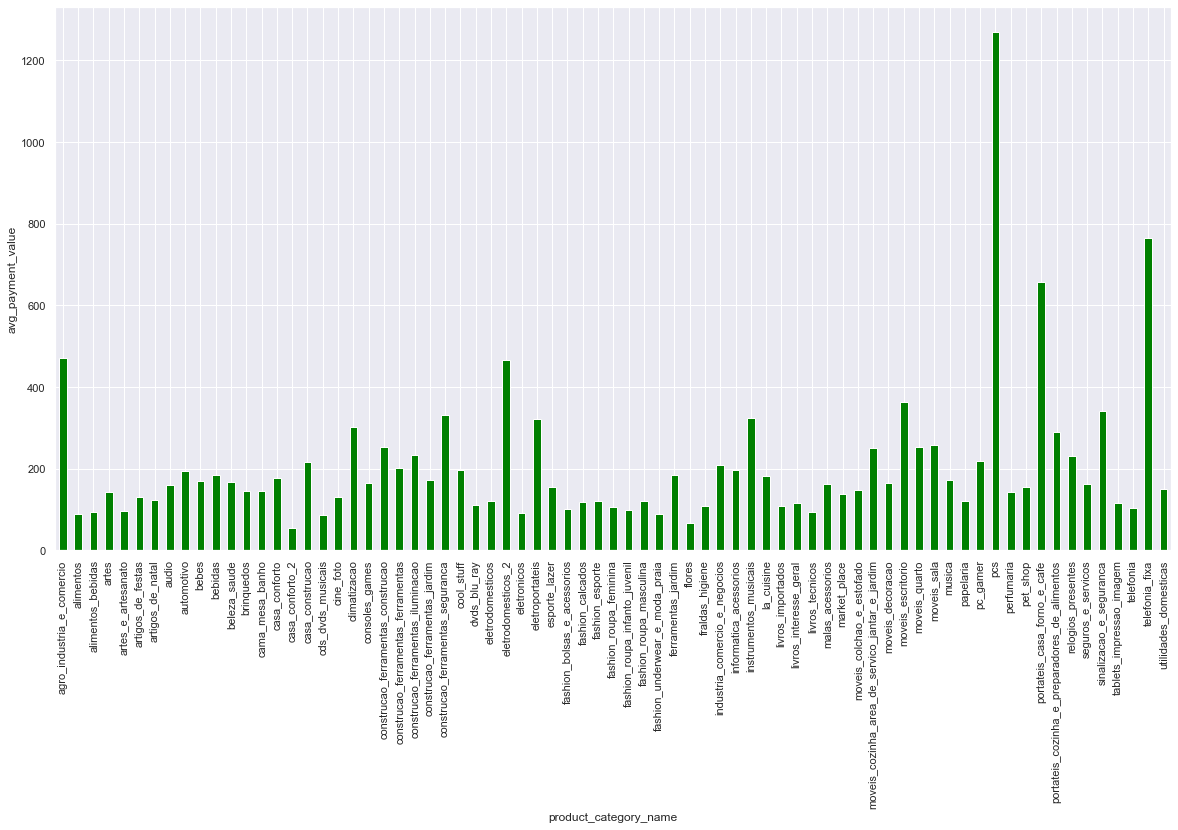

In [16]:
agg = dfmerged3.groupby('product_category_name')['payment_value'].mean()
agg.plot(kind='bar',figsize=(20,10), color = ['green']).set_ylabel('avg_payment_value')

In [17]:
import pandasql as ps

In [18]:
pysqldf = lambda: sqldf(q, globals())

In [19]:
q1 = "SELECT * FROM dfmerged3 WHERE payment_value > 600; "
test = ps.sqldf(q1,locals())

test.shape

(4674, 26)

In [ ]:
test.head()

In [ ]:
q1 = "SELECT * FROM test WHERE payment_installments = 1; "
test2 = ps.sqldf(q1,locals())
test2.head(10)